In [1]:
from fastai.vision.all import plt, np
from jeremai.keypoints.predict import Predictor
import PIL
import cv2
import imutils
import pytesseract

PIL.Image.MAX_IMAGE_PIXELS = None

# from utils.transform import rectify, four_point_transform
from utils.image import toGrayscale, denoise, thresholding, blackhat, whiteSquarify, showImage

In [2]:
p = Predictor('keypoints.pkl')

In [3]:
a= p.predict('data/train/IMG_5569.jpg')

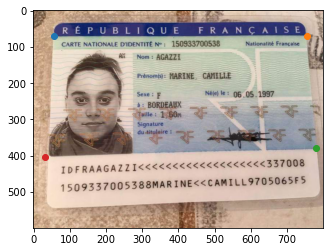

In [4]:
im = PIL.Image.open('data/train/IMG_5569.jpg')

# im = np.array(im)
plt.imshow(im)
plt.scatter(a[0][0], a[0][1])
plt.scatter(a[1][0], a[1][1])
plt.scatter(a[2][0], a[2][1])
plt.scatter(a[3][0], a[3][1])

In [5]:
def four_point_transform(image, rect):
    # obtain a consistent order of the points and unpack them
    # individually
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    print(dst)

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

In [6]:
img = cv2.imread('data/train/IMG_5569.jpg', 1)
# img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)


In [8]:
roi = four_point_transform(img, np.array(a))
height, width, z = roi.shape

[[  0.   0.]
 [747.   0.]
 [747. 332.]
 [  0. 332.]]


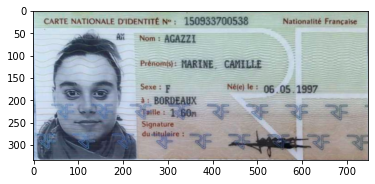

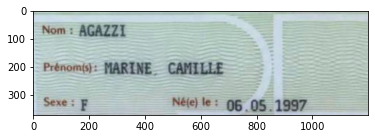

In [9]:
showImage(roi)
y=int(10*height/100)
x=int(30*width/100)
h=int(height/1.75)
w=int(width-20)
crop = roi[y:h, x:w]
crop = imutils.resize(crop, width=1200)
showImage(crop)

In [16]:
# gray = toGrayscale(crop)
# showImage(gray, gray=True)
# blurred = denoise(gray, 5)
# bh = blackhat(blurred, (10,20))
# showImage(blurred, gray=True)

# dst=cv2.bitwise_not(bh)


# showImage(dst, gray=True)



# _, th = cv2.threshold(dst, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# # showImage(th, gray=True)

custom_config = r'--oem 3 --psm 6 -c load_system_dawg=false load_freq_dawg=false load_unambig_dawg=false load_punc_dawg=false load_number_dawg=false load_fixed_length_dawgs=false load_bigram_dawg=false wordrec_enable_assoc=false'
full = pytesseract.image_to_string(crop, config=custom_config, lang='mrz+fra')
print(full)

Nom : AGAZZI
Prénom: MARINE. CAMILLE
Sexe: F Néte) le : 06.05.1997

